In [13]:
import chess
from abc import abstractmethod

# Evaluation Function 101

Yalnizca materyalleri dikkate alan bir evaluation function yazalim

In [14]:
import random

In [15]:
random.random()

0.22597507534591577

In [16]:
from chess import Board

In [17]:
board = Board()

In [25]:
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [18]:
import random
# Object-oriented gidelim ve bir feature'i bu sekilde tanimlayalim
from collections import Counter


class Feature:
    def __init__(self, name, side="both"):
        self.name = name
        if side not in ("black", "white", "both"):
            raise "Side must be one of black and white or both"
        self.side = side
        
    @abstractmethod
    def value(board:chess.Board)-> int|float:
        ...
        
class Evaluator:
    def __init__(self, list_of_features: list[Feature]):
        self.list_of_features = list_of_features
        # basta rastgele degerler verelim
        self.feature_weights = {f.name:random.random() for f in self.list_of_features}
        self.feature_names = self.feature_weights.keys()
        
    def evaluate(self,board: chess.Board):
        total_score = 0
        for feature in self.list_of_features:
            score = feature.value(board)
            if feature.side == "black":
                score = score * -1
            total_score += score * self.feature_weights[feature.name]
        return total_score
    
    def update_feature_weight(self, feature_name, new_weight):
        if feature_name not in self.feature_names:
            print(f"{feature_name} is not defined. Must be one of {self.feature_names}")
        self.feature_weights[feature_name] = new_weight
        
class PieceCountFeature(Feature):
    def __init__(self, name, piece_ids:dict[str, str]):
        super(PieceCountFeature, self).__init__(name, "both")
        self.piece_ids =  piece_ids
    def value(self, board):
        piece_counts = Counter(str(board)) 
        return piece_counts[self.piece_ids["white"]] - piece_counts[self.piece_ids["black"]]
    


In [21]:
feature_a = Feature("abc")

In [22]:
feature_a.name

'abc'

In [23]:
feature_a.side

'both'

In [26]:
board = chess.Board()

In [27]:
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [28]:
piyon_count = PieceCountFeature("piyon_count", {"white":"P","black":"p"})

In [29]:
feature_list = [
    piyon_count
]

In [30]:
satranc_evaluator = Evaluator(feature_list)

In [31]:
satranc_evaluator.evaluate(board)

0.0

In [35]:
board = """
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . Q . .
. . . . . . . .
. . . . . . . .
P P P P P . P P
R N B . K B N R
"""

In [36]:
satranc_evaluator.evaluate(board)

-0.8089816292881677

In [37]:
satranc_evaluator.feature_weights['piyon_count']

0.8089816292881677

In [38]:
piyon_count = PieceCountFeature("piyon_count", {"white":"P","black":"p"})
at_count = PieceCountFeature("at_count", {"white":"N","black":"n"})
fil_count = PieceCountFeature("fil_count", {"white":"B","black":"b"})
kale_count = PieceCountFeature("kale_count", {"white":"R","black":"r"})
vezir_count = PieceCountFeature("vezir_count", {"white":"Q","black":"q"})

In [39]:
feature_list = [
    piyon_count,
    at_count,
    fil_count,
    kale_count,
    vezir_count
]

In [40]:
satranc_evaluator = Evaluator(feature_list)

In [41]:
board = """
r n b . k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P . P P
R N B Q K B N R
"""

In [42]:
satranc_evaluator.evaluate(board)

0.023903896848557205

In [43]:
v_w = satranc_evaluator.feature_weights['vezir_count']

In [44]:
p_w = satranc_evaluator.feature_weights['piyon_count']

In [45]:
-p_w + v_w

0.023903896848557205

## Feature-based evaluation function and Equivalence Classes

Biz bir state'i (satranc icin tahta pozisyonu) yalnizca weighted combination of features olarak tanimlarsak, feature value'su ayni olan butun pozisyonlar equivalence class olusturur. Bu da satrancta ve gercek hayatta cok limitleyici olabilir. 


# Stockfish

Acik kaynak kodlu bir satranc yapay zeka sistemi  


[wikipedia](https://en.wikipedia.org/wiki/Stockfish_(chess))


"Stockfish has consistently ranked first in most of the chess engine rating lists and, as of September 2023, is the strongest CPU chess engine in the world with an estimated Elo rating of 3546 "

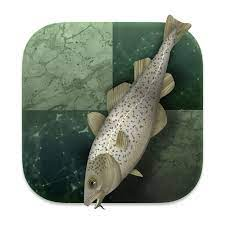

In [122]:
from IPython.display import Image
Image(filename='stockfish_image.jpeg')

## Installation

- engine download: https://stockfishchess.org/download/ 

- python library: https://pypi.org/project/stockfish/ 

## Stockfishten ogrenen bir program yapabilir miyiz? 


In [46]:
from stockfish import Stockfish

In [47]:
stockfish = Stockfish()

In [48]:
from chess import Board
board = Board()

In [49]:
board.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

In [50]:
stockfish.set_fen_position(board.fen())

In [51]:
stockfish.get_top_moves(1)

[{'Move': 'e2e4', 'Centipawn': 33, 'Mate': None}]

In [ ]:
0.33

In [52]:
stockfish_board = stockfish.get_board_visual()

In [53]:
print(stockfish_board)

+---+---+---+---+---+---+---+---+
| r | n | b | q | k | b | n | r | 8
+---+---+---+---+---+---+---+---+
| p | p | p | p | p | p | p | p | 7
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 6
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 5
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 4
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 3
+---+---+---+---+---+---+---+---+
| P | P | P | P | P | P | P | P | 2
+---+---+---+---+---+---+---+---+
| R | N | B | Q | K | B | N | R | 1
+---+---+---+---+---+---+---+---+
  a   b   c   d   e   f   g   h



In [ ]:
#ders